In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200529_Lick_3-m

## Si II 6355

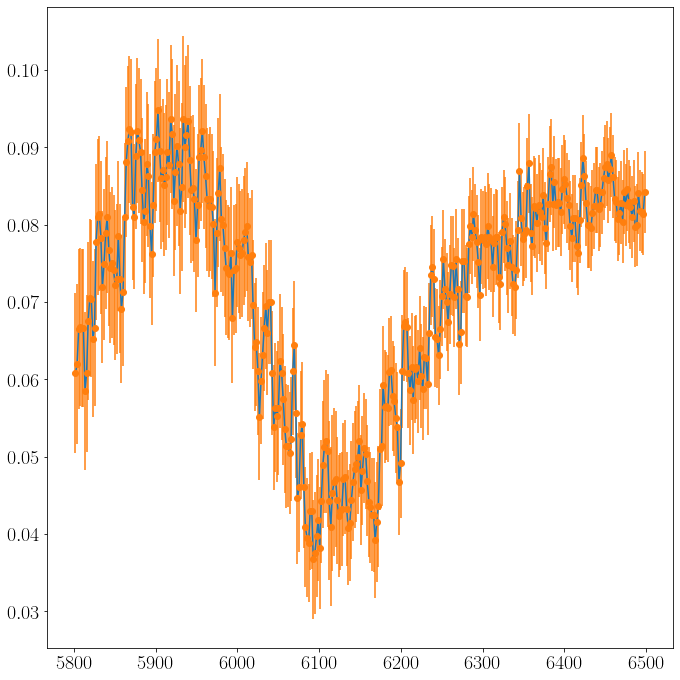

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

258 points within 5900.00 and 6400.00 angstroms.


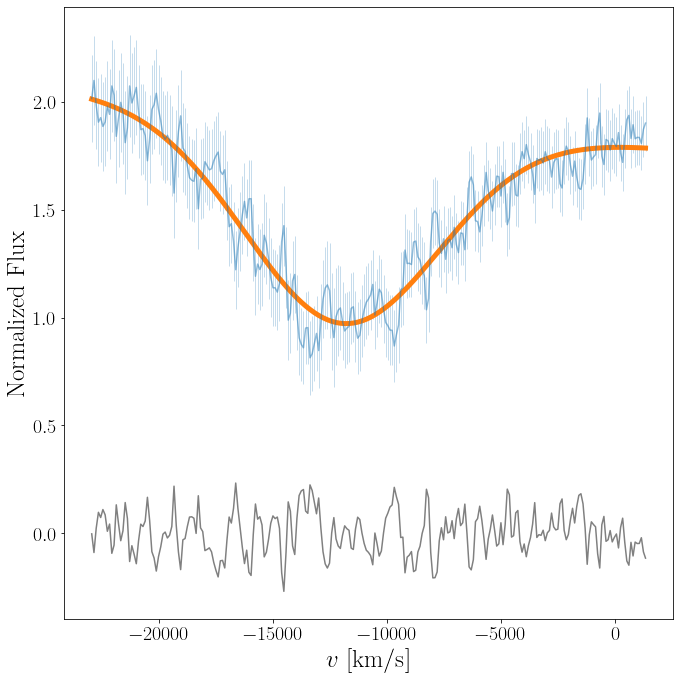

LS estimation:
Velocity pvf: -11426 km/s


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

  6%|▌         | 2850/50000 [01:11<19:49, 39.63it/s]


MCMC results:
Velocity pvf: -11327 pm 84 km/s


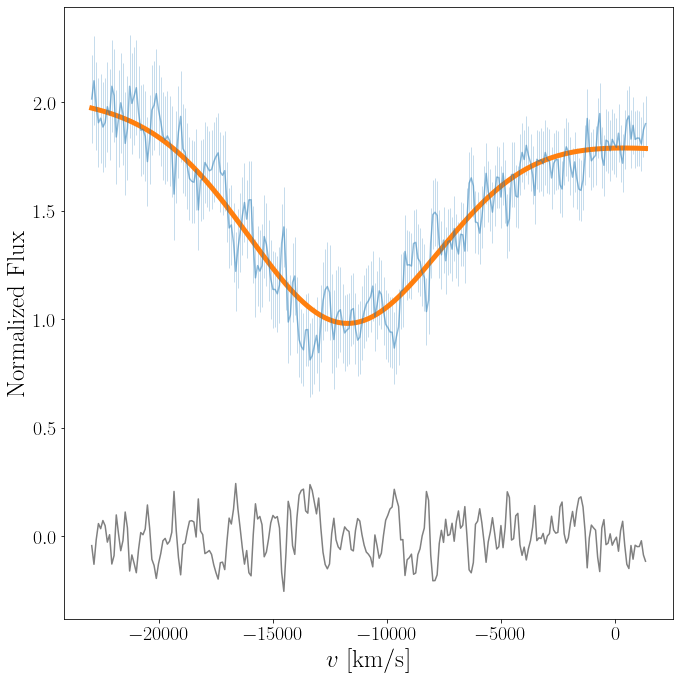

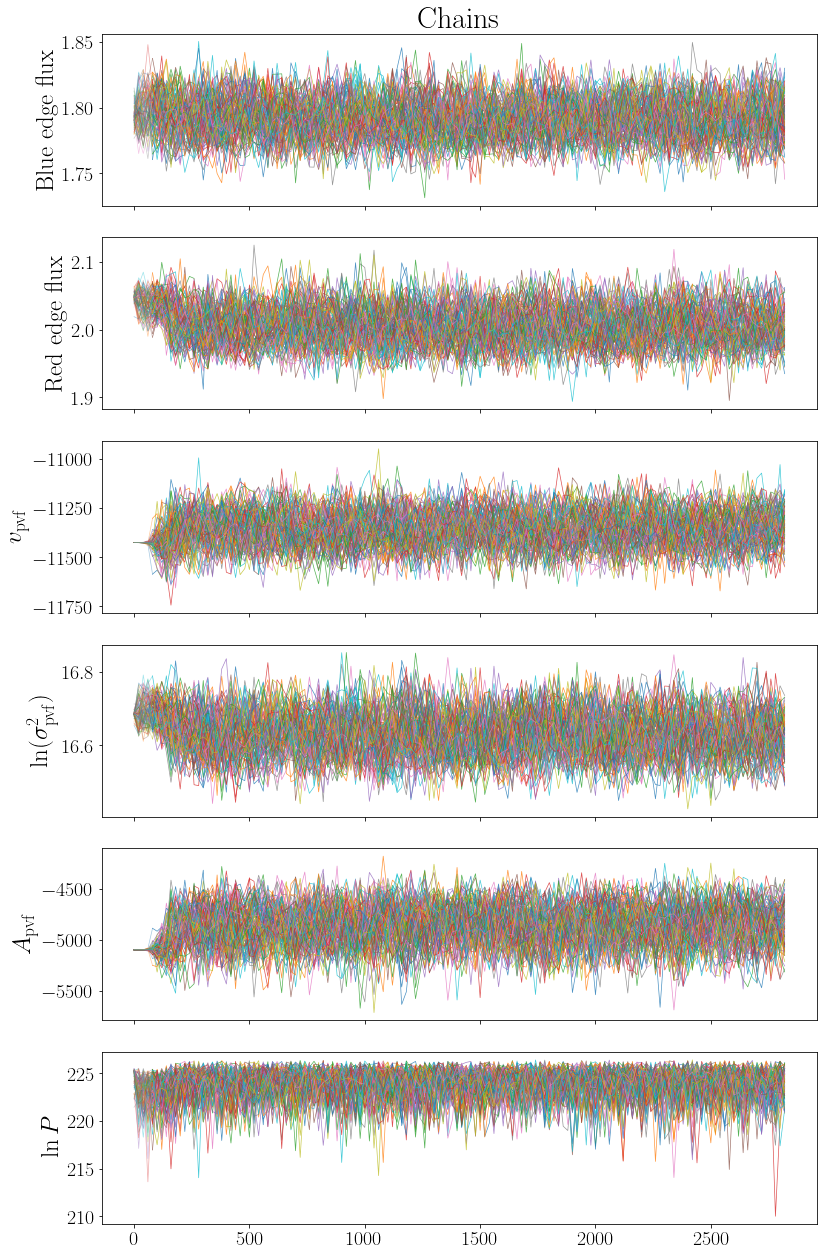

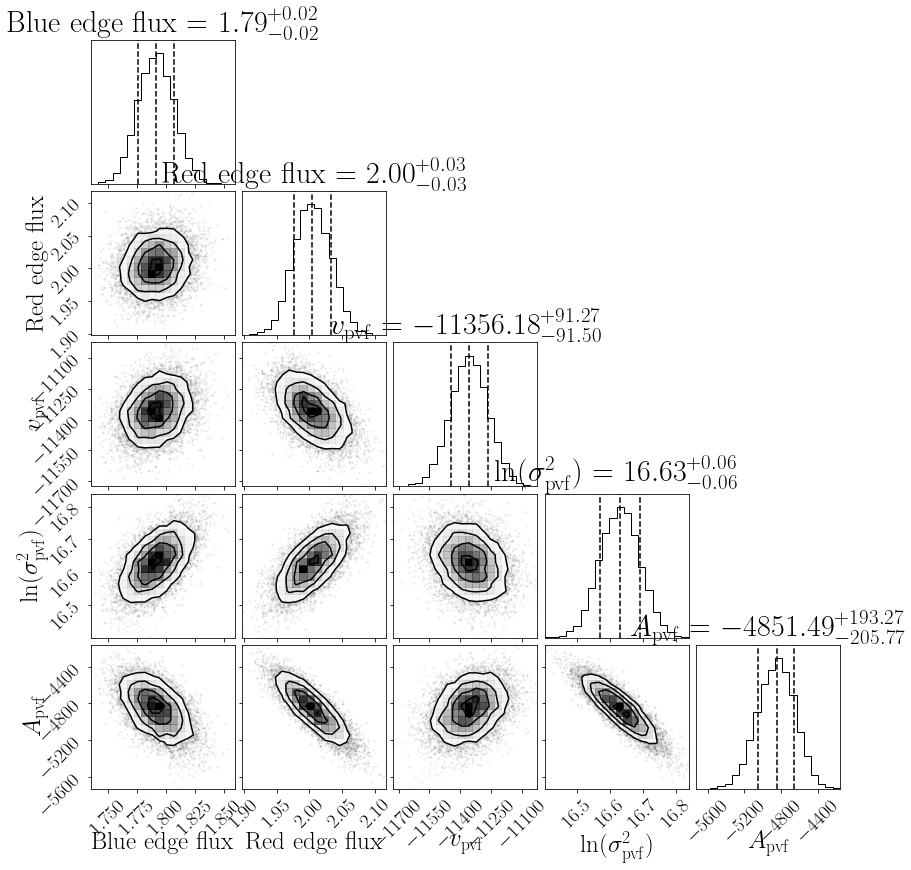

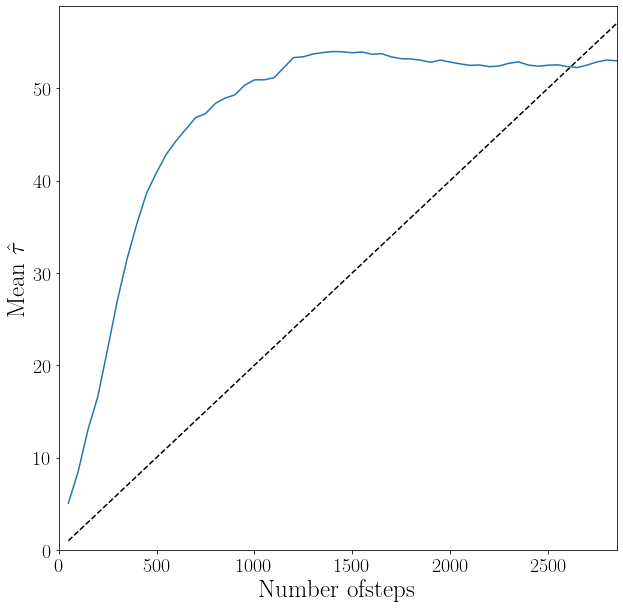

In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

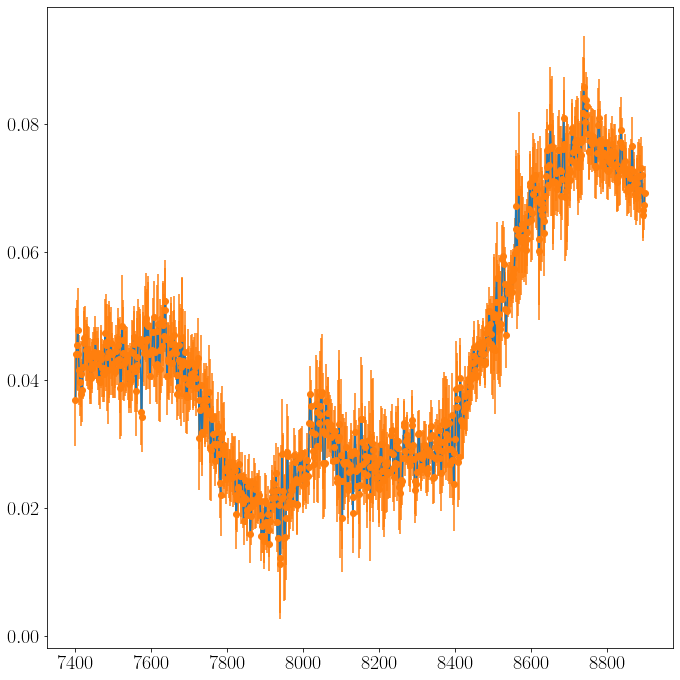

In [7]:
Spec1.plot_line_region(7400, 8900)

In [8]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

567 points within 7600.00 and 8700.00 angstroms.


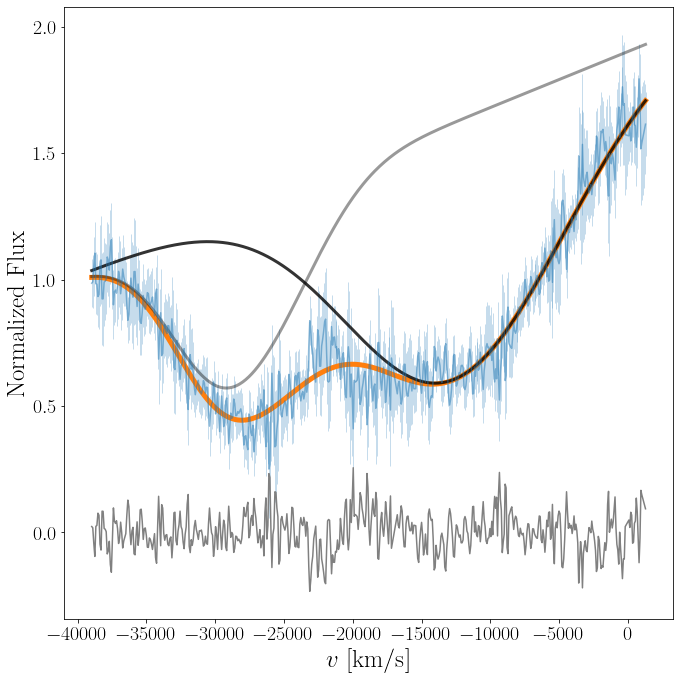

LS estimation:
Velocity pvf: -9247 km/s
Velocity hvf: -24832 km/s


In [9]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 3/50000 [00:00<35:55, 23.20it/s]

MCMC results:
Velocity pvf: -10849 pm 73 km/s
Velocity hvf: -25444 pm 101 km/s


  8%|▊         | 4000/50000 [02:38<30:22, 25.25it/s]  


MCMC results:
Velocity pvf: -10821 pm 64 km/s
Velocity hvf: -25406 pm 102 km/s


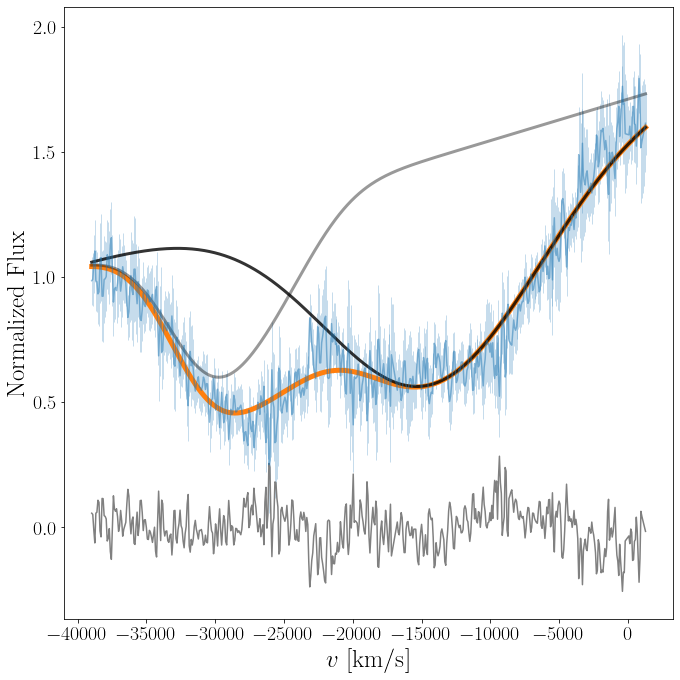

In [ ]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=2000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)